In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from data.clean_churn_data import clean_churn_data
%load_ext autoreload
%autoreload 2

In [3]:
churn = pd.read_csv('data/churn_train.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [4]:
churn = clean_churn_data(churn)
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39681 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                39681 non-null  float64
 1   avg_rating_by_driver    39681 non-null  float64
 2   avg_rating_of_driver    39681 non-null  float64
 3   avg_surge               39681 non-null  float64
 4   phone                   39681 non-null  int64  
 5   surge_pct               39681 non-null  float64
 6   trips_in_first_30_days  39681 non-null  int64  
 7   luxury_car_user         39681 non-null  int64  
 8   weekday_pct             39681 non-null  float64
 9   city: Astapor           39681 non-null  int64  
 10  city: King's Landing    39681 non-null  int64  
 11  city: Winterfell        39681 non-null  int64  
 12  churn?                  39681 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 4.2 MB


[27628 14850 13138  8090 18453 24747]
[12053 24831 26543 31591 21228 14934]


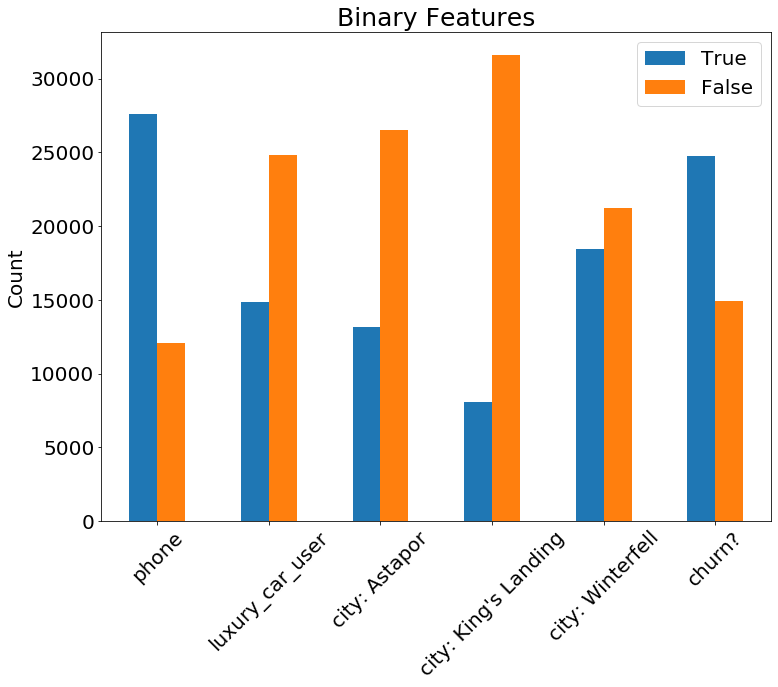

In [45]:
cols = ['phone','luxury_car_user','city: Astapor',"city: King's Landing",'city: Winterfell','churn?']

ones = churn[cols].sum(axis=0).values
zeros = churn.shape[0] - ones
print(ones)
print(zeros)

plot_df = pd.DataFrame({'1': ones, '0': zeros}, index=cols)

fig, ax = plt.subplots(figsize=(12,9))
plot_df.plot.bar(ax=ax, fontsize=20, rot=45);
ax.set_title('Binary Features', fontsize=25);
ax.set_ylabel('Count', fontsize=20);
ax.legend(['True','False'], fontsize=20);
fig.savefig('img/binary_bar_chart.png')

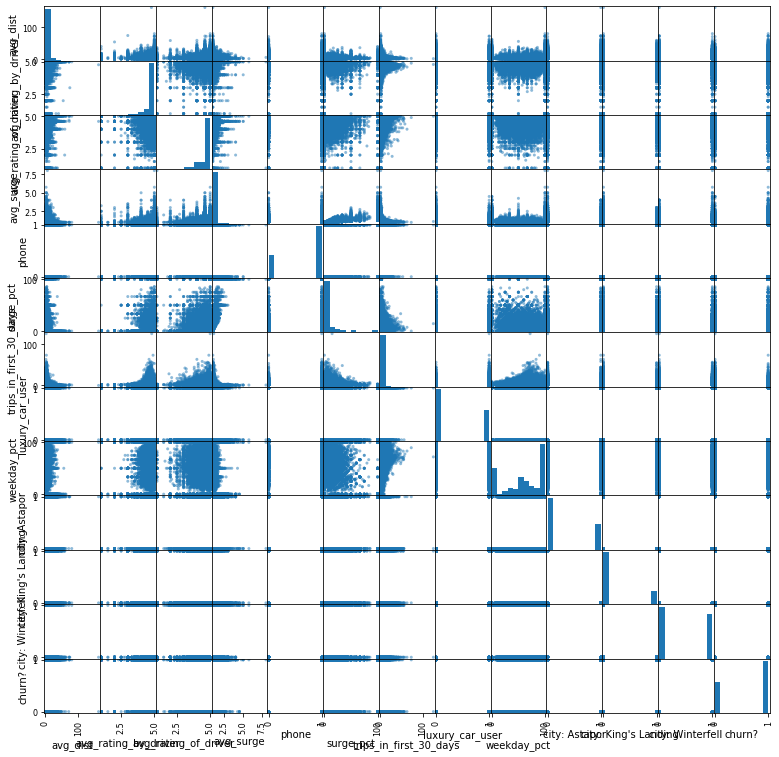

In [42]:
pd.plotting.scatter_matrix(churn, figsize=(13,13));